In [1]:
from io import BytesIO

In [2]:
import requests

In [3]:
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

In [4]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dV6m0EVrlGkH7Yj_-NjX99--hWLs_rCs444WYxgkHiE"

In [5]:
stream = requests.get("{0}/export?format=xlsx".format(spreadsheet_url))

In [6]:
relations = pd.read_excel(BytesIO(stream.content), sheetname=0)

In [7]:
relations.head()

,Parent,Child
0,Ort,[Kontinente]
1,[Kontinente],[Nationen]
2,[Nationen],[Bundesländer]
3,[Bundesländer],[Landkreise]
4,[Landkreise],[Städte]


In [8]:
nodes = sorted(set(relations["Parent"].unique()) | set(relations["Child"].unique()))
node2id = {n: i + 1 for (i, n) in enumerate(nodes)}

In [9]:
category_nodes_columns = ["id"]

In [10]:
category_nodes_export = pd.DataFrame({"id": [node2id[n] for n in nodes]})

In [11]:
category_nodes_export.to_csv("category_nodes.csv", index=False, columns=category_nodes_columns, header=False)

In [12]:
category_nodes_translations_columns = ["id", "category_node_id", "title", "locale"]

In [13]:
category_nodes_translations_export = pd.DataFrame({
        "category_node_id": [node2id[n] for n in nodes],
        "locale": "de",
        "title": nodes})
category_nodes_translations_export["id"] = category_nodes_translations_export.index + 1

In [14]:
category_nodes_translations_export.to_csv("category_nodes_translations.csv", index=False,
                                          columns=category_nodes_translations_columns, header=False)

In [15]:
edges = [(node2id[u], node2id[v]) for (u, v) in relations.itertuples(index=False)]

In [16]:
category_edges_columns = ["id", "from_node_id", "to_node_id"]

In [17]:
category_edges_export = pd.DataFrame({"from_node_id": [e[0] for e in edges], "to_node_id": [e[1] for e in edges]})
category_edges_export["id"] = category_edges_export.index + 1

In [18]:
category_edges_export.to_csv("category_edges.csv", index=False, columns=category_edges_columns, header=False)

In [19]:
net = pgv.AGraph(name="categories", directed=True, size=(10, 10))
for n in nodes:
    net.add_node(node2id[n], label=n)
for (u, v) in edges:
    net.add_edge(u, v)

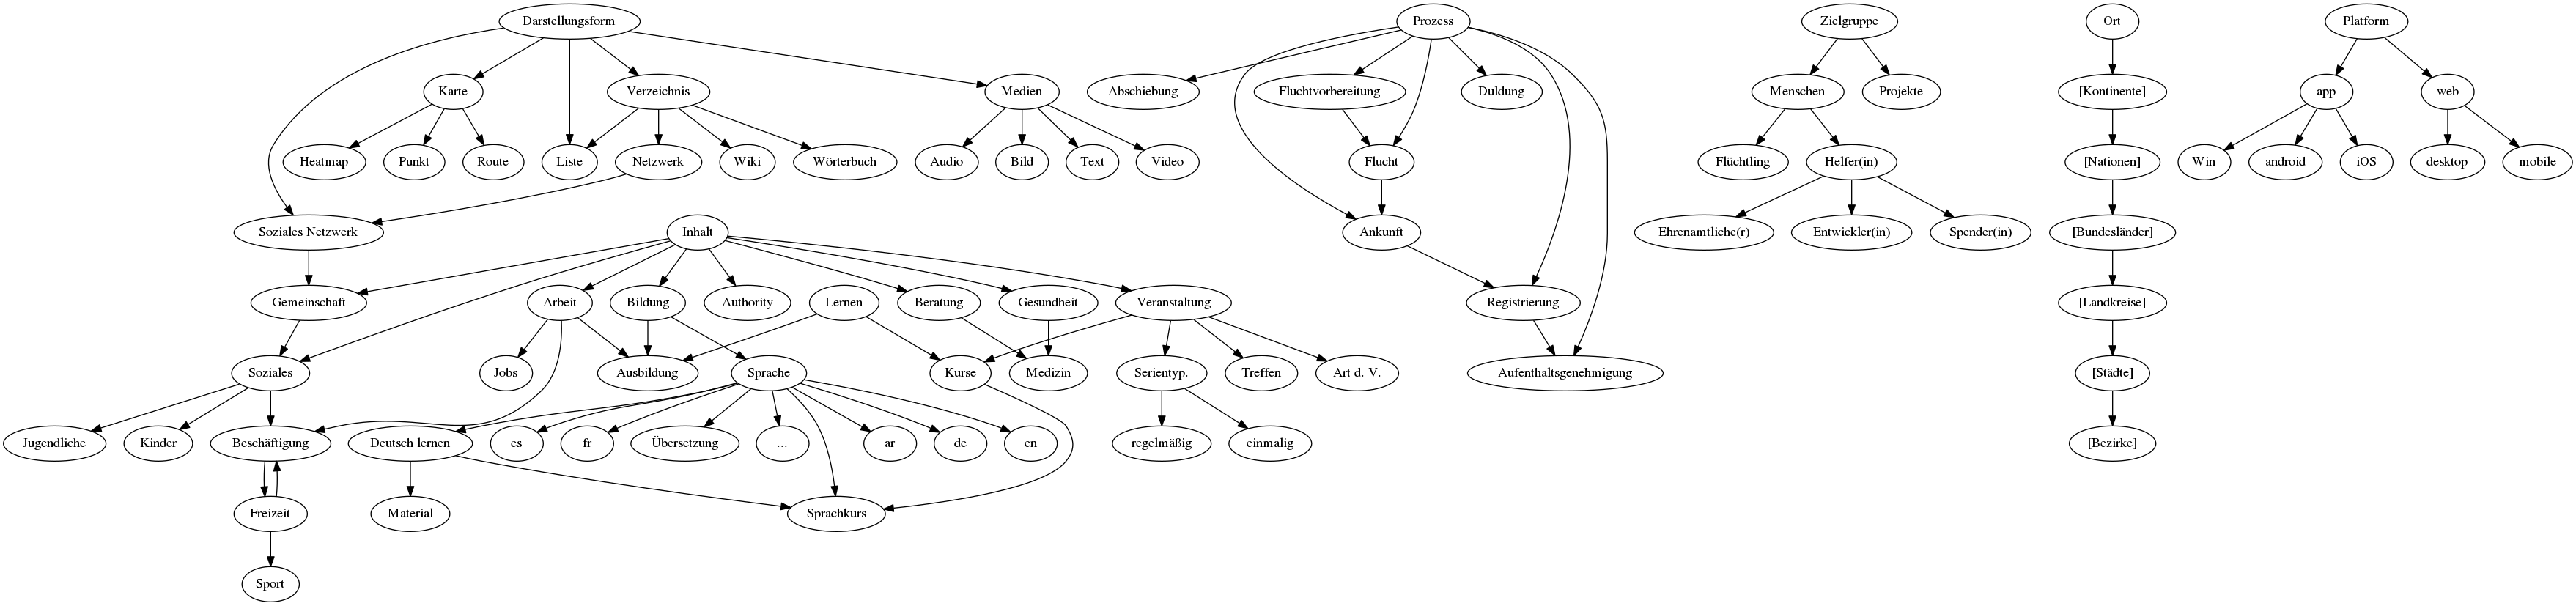

In [20]:
filename = "relations.png"
net.draw(filename, prog="dot", args="")
Image(filename=filename)

In [21]:
net.draw("relations.svg", prog="dot", args="")

In [22]:
net.draw("relations.pdf", prog="dot", args="")